## QuantEcon

In [1]:
using LinearAlgebra, Statistics, Plots, LaTeXStrings

┌ Warning: attempting to remove probably stale pidfile
│   path = /home/ikutoyoshioka/.julia/compiled/v1.11/Plots/ld3vC_v1nT3.ji.pidfile
└ @ FileWatching.Pidfile /home/ikutoyoshioka/.julia/juliaup/julia-1.11.5+0.x64.linux.gnu/share/julia/stdlib/v1.11/FileWatching/src/pidfile.jl:249


### 2. Introductory Examples

In [4]:
# normal distribution with mean 0 and standard deviation 1
rand(3)

3-element Vector{Float64}:
 0.8116098238525691
 0.3721513983054291
 0.48083570318737545

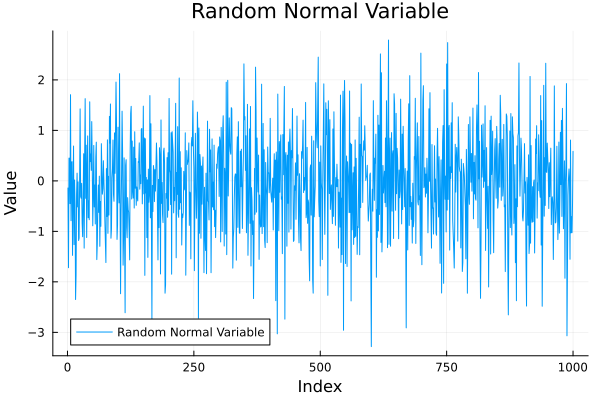

In [3]:
n = 1000
ϵ = randn(n)
plot(1:n, ϵ, label="Random Normal Variable", title="Random Normal Variable", xlabel="Index", ylabel="Value")

In [ ]:
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
ϵ[1:5]
#=
array indices start at 1
=#

5-element Vector{Float64}:
 -0.14117103591740873
 -1.7194662989947218
  0.4504114510510427
  0.4493917176605493
 -0.45104593994136877

In [9]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [10]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [12]:
ep_sum = 0.0
m = 5
for ep_val in ϵ[1:m]
    ep_sum = ep_sum + ep_val
end
ep_mean = ep_sum / m

-0.11705236942389338

In [13]:
ep_mean ≈ mean(ϵ[1:m])
isapprox(ep_mean, mean(ϵ[1:m]))
ep_mean ≈ sum(ϵ[1:m]) / m

true

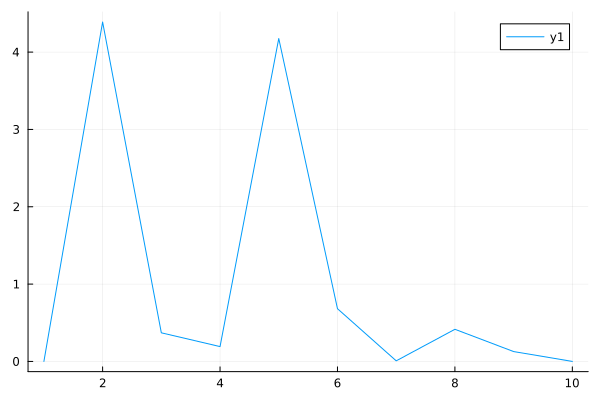

In [14]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end

data = generatedata(10)
plot(data)

In [15]:
# still poor style
function genaratedata(n)
    ϵ = randn(n) # use built-in function

    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    return ϵ
end
data = generatedata(5)

5-element Vector{Float64}:
 2.9438249859474896
 1.3680619706482995
 0.24334197576423452
 0.5011796153538411
 0.03785237634069907

In [17]:
# better style
function generatedata(n)
    ϵ = randn(n)
    return ϵ .^ 2 # element-wise operation
end
data = generatedata(5)

5-element Vector{Float64}:
 0.28693205115047665
 1.75791597829768
 0.21015274821496288
 0.1936389187095859
 0.015395125493700885

In [18]:
# good style
generatedata(n) = randn(n) .^ 2 # one-liner
data = generatedata(5)

5-element Vector{Float64}:
 0.006793132934041505
 0.41167986119531097
 1.3310769485600786
 0.19597038492265093
 0.9472815816274879

In [19]:
# good style
f(x) = x^2
generatedata(n) = f.(randn(n)) # element-wise operation
data = generatedata(5)

5-element Vector{Float64}:
 0.6061825374750034
 0.1346797407662511
 0.03847335825003646
 0.5206770724549318
 0.6673783539091219

In [20]:
generatedata(n, gen) = gen.(randn(n)) # broadcasts on gen
f(x) = x^2
data = generatedata(5, f)

5-element Vector{Float64}:
 1.5786161104771774
 0.055299187615582356
 2.5533480288713815
 0.6608490039333306
 0.054352944024447784

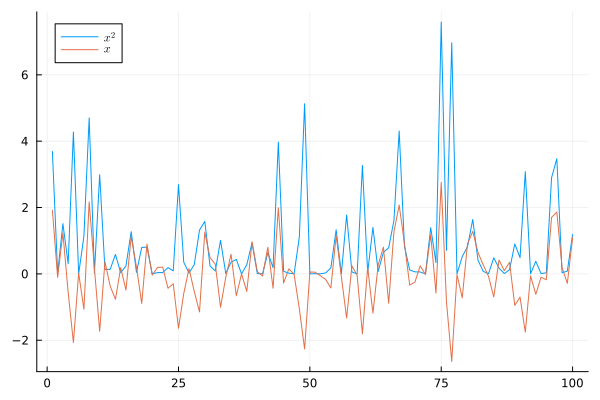

In [ ]:
# direct solustion with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x = randn(n)
plot(f.(x), label = L"x^2")  # L is for LaTeX formatting
plot!(x, label = L"x")  # plot! adds to the existing plot

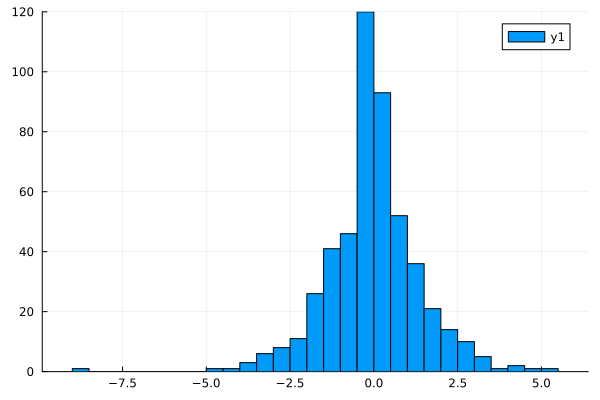

In [24]:
using Distributions

function plothistogram(distribution, n)
    ϵ = rand(distribution, n)
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp, 500)

In [26]:
using CSV, DataFrames

gdp = CSV.File("JPNRGDPEXP.csv")
gdp = DataFrame(gdp)
first(gdp, 5) # first 5 rows

Row,observation_date,JPNRGDPEXP
,Date,Float64
1,1994-01-01,4.46236e5
2,1994-04-01,4.43829e5
3,1994-07-01,4.48905e5
4,1994-10-01,4.47176e5
5,1995-01-01,4.52033e5


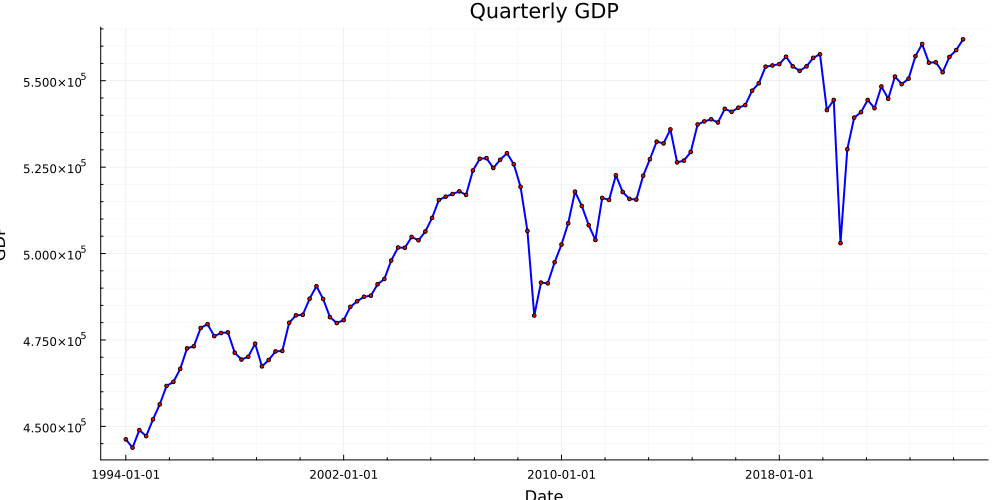

In [32]:
plot(gdp.observation_date, gdp.JPNRGDPEXP,
     xlabel = "Date", ylabel = "GDP", title = "Quarterly GDP",
     seriestype=:line, legend=false, lw=2, color=:blue,
     label = "GDP", grid = true, markersize=2, size=(1000, 500), minorgrid = true)
plot!(gdp.observation_date, gdp.JPNRGDPEXP,
     xlabel = "Date", ylabel = "GDP", title = "Quarterly GDP",
     seriestype=:scatter, legend=false, lw=2, color=:red,
     label = "GDP", grid = true, markersize=2, size=(1000, 500))